# Read and Parse Chainer logs

# CIFAR100 runs with same hyper-parameters
## 24 runs x 500 epochs on DL server, Adam optimisation
b512

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os

In [3]:
!ls logs/series/*

logs/series/cifar_adam_e500_run_0.log  logs/series/cifar_adam_e500_run_2.log
logs/series/cifar_adam_e500_run_1.log  logs/series/cifar_adam_e500_run_20.log
logs/series/cifar_adam_e500_run_10.log logs/series/cifar_adam_e500_run_21.log
logs/series/cifar_adam_e500_run_11.log logs/series/cifar_adam_e500_run_22.log
logs/series/cifar_adam_e500_run_12.log logs/series/cifar_adam_e500_run_23.log
logs/series/cifar_adam_e500_run_13.log logs/series/cifar_adam_e500_run_3.log
logs/series/cifar_adam_e500_run_14.log logs/series/cifar_adam_e500_run_4.log
logs/series/cifar_adam_e500_run_15.log logs/series/cifar_adam_e500_run_5.log
logs/series/cifar_adam_e500_run_16.log logs/series/cifar_adam_e500_run_6.log
logs/series/cifar_adam_e500_run_17.log logs/series/cifar_adam_e500_run_7.log
logs/series/cifar_adam_e500_run_18.log logs/series/cifar_adam_e500_run_8.log
logs/series/cifar_adam_e500_run_19.log logs/series/cifar_adam_e500_run_9.log


In [5]:
filename_pattern=re.compile(r"cifar_adam_e500.*\.log")

In [6]:
logs_directory =  "logs/series/"
list_command = "ls -1 "+logs_directory
files=[]
proc = subprocess.Popen(list_command.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    line = line.strip(" \n")
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logs_directory,line)))
files

['/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_0.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_1.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_10.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_11.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_12.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_13.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_14.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_15.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_16.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_adam_e500_run_17.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/seri

In [9]:
run_pattern = re.compile(r"cifar_adam_e500.*run_(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
def fileToDF(logfile):
    remove_str="[J"
    global run_pattern
    global output_pattern
    m = run_pattern.search(logfile)
    if m:
        run = int(m.group(1))        
    else:
        print "No match in filename:",logfile
        return None
    with open(logfile,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0
        ind = 0
        loss = 0
        acc = 0
        learn = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
        for line in lines:
            s = line.strip(' \n')
            s = s.replace(remove_str,"")
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1
                    
    return df

In [11]:
df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(12000, 5)


,run,epoch,loss,acc,time
0,0.0,1.0,4.71910,0.010110,24.5502
1,0.0,2.0,4.92875,0.020157,48.3813
2,0.0,3.0,4.35085,0.030595,72.1387
3,0.0,4.0,4.44522,0.037345,96.2896
4,0.0,5.0,3.86801,0.076586,120.5100


In [12]:
df_loss = df.pivot(index="epoch",columns="run")["loss"]
df_acc = df.pivot(index="epoch",columns="run",values="acc")
df_time = df.pivot(index="epoch",columns="run",values="time")
df_acc.head()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
1.0,0.010110,0.010036,0.010024,0.010024,0.010219,0.010110,0.010110,0.010110,0.011575,0.010110,...,0.010122,0.010024,0.009938,0.011684,0.010110,0.010903,0.009938,0.009938,0.010306,0.010283
2.0,0.020157,0.021329,0.013333,0.020111,0.010501,0.023650,0.012184,0.011673,0.024236,0.017193,...,0.013419,0.010903,0.018095,0.014591,0.017205,0.012747,0.017900,0.016653,0.021479,0.015654
3.0,0.030595,0.020904,0.036345,0.028010,0.042147,0.026540,0.034392,0.020330,0.052706,0.035357,...,0.013735,0.028033,0.031267,0.037534,0.028814,0.025431,0.032588,0.017130,0.034220,0.028240
4.0,0.037345,0.041659,0.054124,0.041659,0.040878,0.042096,0.042429,0.044479,0.056870,0.036851,...,0.029056,0.055417,0.045427,0.066067,0.056836,0.048593,0.042027,0.038482,0.039608,0.043268
5.0,0.076586,0.067860,0.069692,0.061265,0.068704,0.084306,0.040142,0.056934,0.086144,0.071582,...,0.079532,0.067785,0.060742,0.081193,0.060667,0.048116,0.087684,0.078360,0.091153,0.060007


In [13]:
def plot(df,**kwargs):
    ax = df.plot(**kwargs)
    ax.set_xlim(0,500)
    major = np.arange(0,501,100)
    ax.set_xticks(major)
    ax.xaxis.grid(which="major", linestyle=":",color="#cccccc")
    minor = np.arange(25,476,25)
    ax.set_xticks(minor, minor=True)
    ax.xaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.5)
    ax.yaxis.grid(linestyle="-",color="black",alpha=0.05)
    return ax

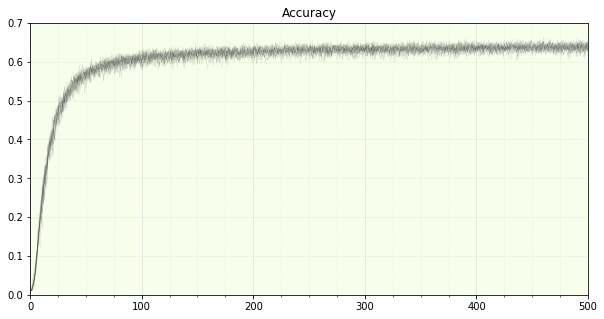

In [14]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_ylim(0,.7)
ax.set_facecolor("#F7FEEB")

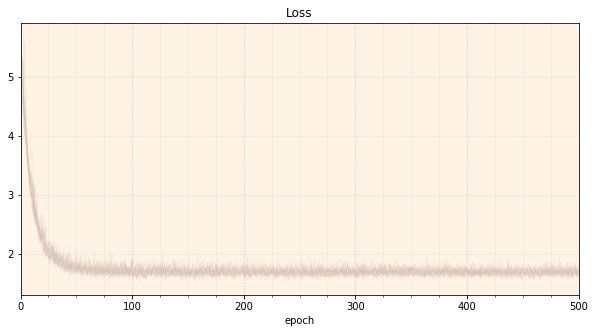

In [15]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")

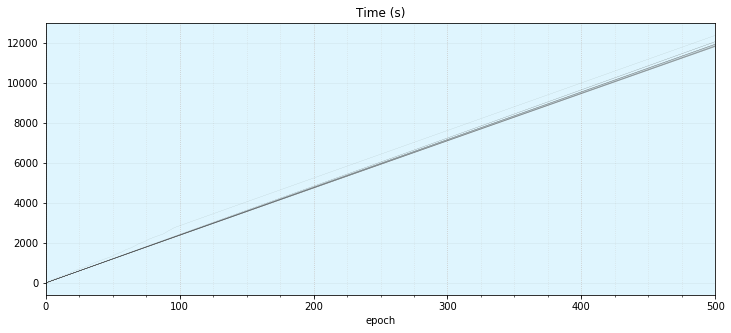

In [16]:
ax = plot(df_time,legend=False,figsize=(12,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Time (s)")
#ax.set_ylabel("s")
ax.set_facecolor("#00B7FA20")

In [139]:
# Save data to CSV files
logfile = os.path.join(logs_directory,"cifar_e500")
df_loss.to_csv(logfile+"-loss.csv")
df_acc.to_csv(logfile+"-acc.csv")
df_time.to_csv(logfile+"-time.csv")

In [17]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [18]:
slice_epoch = [10.,40.,50.,200.,500.]
df_loss.iloc[-3:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
498.0,1.68012,1.69531,1.64780,1.70965,1.72059,1.72571,1.72702,1.82607,1.68717,1.66657,...,1.69281,1.66062,1.64463,1.67751,1.65699,1.74646,1.62185,1.64012,1.65355,1.67441
499.0,1.63835,1.64941,1.61022,1.64715,1.70069,1.65607,1.63188,1.63897,1.78664,1.69083,...,1.81162,1.74042,1.60775,1.74135,1.60947,1.66283,1.67719,1.64641,1.73278,1.68516
500.0,1.70840,1.69731,1.64992,1.73144,1.78917,1.70035,1.81530,1.74871,1.62958,1.74843,...,1.75299,1.73885,1.65387,1.73928,1.63759,1.65834,1.76165,1.73570,1.74032,1.72766


In [19]:
df_loss_p = df_loss.copy()
df_acc_p = df_acc.copy()
df_time_p = df_time.copy()
i = 0
index = []
for i in range(0,len(slice_epoch)):
    name = str(int(slice_epoch[i]))
    index.append(name)
    df_loss_p.loc[name] = RelativePercentDifference(df_loss_p.loc[slice_epoch[i]])
    df_acc_p.loc[name] = RelativePercentDifference(df_acc_p.loc[slice_epoch[i]])
    df_time_p.loc[name] = RelativePercentDifference(df_time_p.loc[slice_epoch[i]])
df_loss_p.iloc[-5:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
10,99.192708,106.113550,92.017559,100.188910,98.875974,109.842735,93.112001,102.469463,97.161206,101.049415,...,97.584066,97.904086,96.798801,108.644467,98.931172,96.624006,92.469990,95.881455,107.327917,110.719668
40,93.369079,102.302188,103.804492,99.069159,99.736301,94.680850,99.610010,102.897948,98.481086,96.813506,...,106.153489,96.283637,98.658441,96.608148,102.595401,95.775182,103.874775,104.566626,93.337232,109.420561
50,101.255596,99.099214,104.066363,102.304298,92.209913,101.279188,100.812411,104.842077,94.731964,98.315075,...,112.770531,92.058814,98.632999,95.672257,107.966837,96.762525,104.223641,96.950695,94.359554,101.305588
200,98.059292,93.455036,97.872323,107.284853,95.143636,97.381970,96.531791,103.273254,101.011989,95.488764,...,100.030108,99.622069,101.384750,102.287257,98.303880,105.783810,104.743135,100.033636,97.649489,100.277636
500,99.637262,98.990471,96.226593,100.981000,104.347928,99.167770,105.871881,101.988220,95.040324,101.971890,...,102.237838,101.413166,96.456964,101.438244,95.507483,96.717664,102.742907,101.229452,101.498899,100.760543


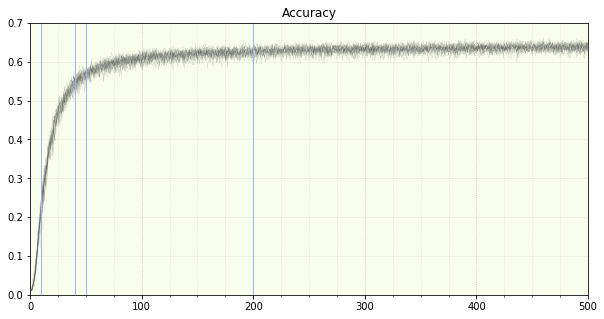

In [20]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_facecolor("#F7FEEB")
ax.set_ylim(0,0.7)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [0,0.7]
    ax.plot(xx,yy,lw=1,color=(.6,.7,1))

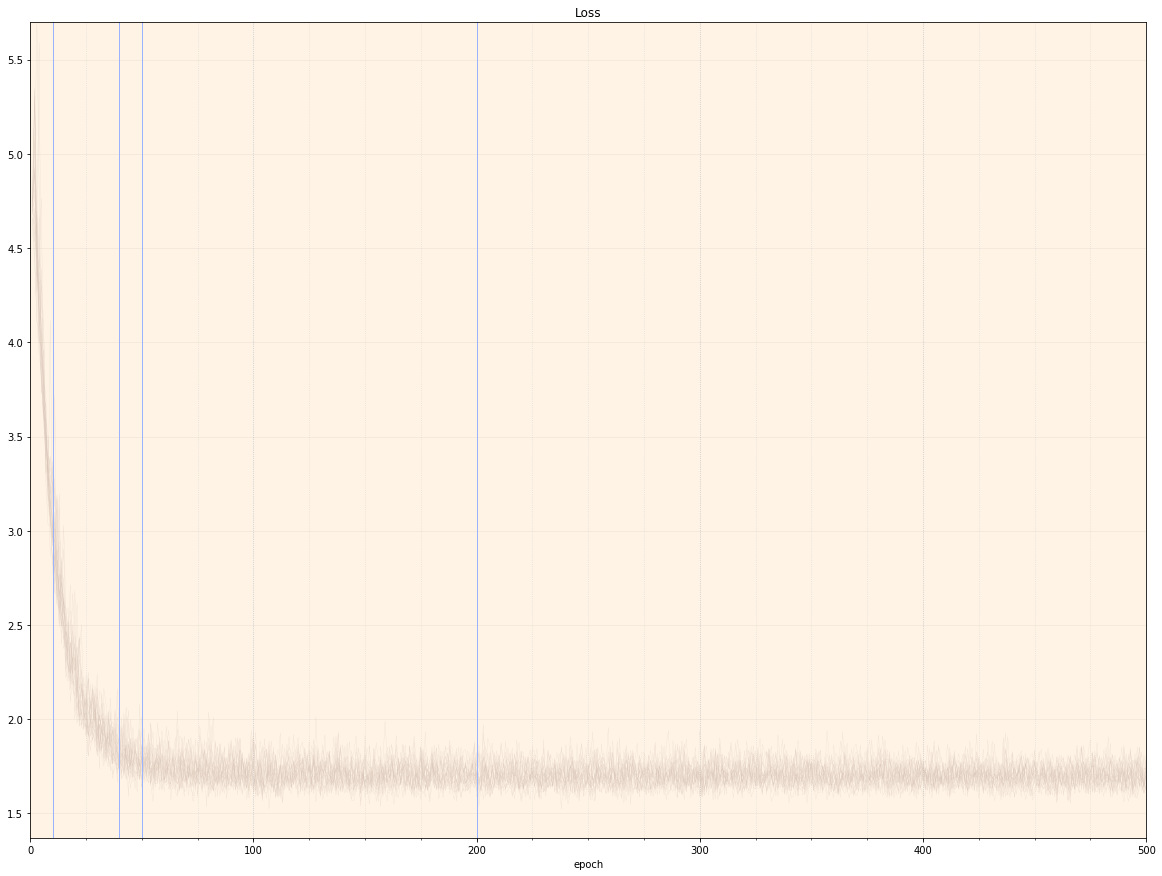

In [24]:
ax = plot(df_loss,legend=False,figsize=(20,15),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [ymin,ymax]
    ax.plot(xx,yy,lw=1,color=(.6,.7,1))

In [22]:
def plotBox(df, **kwargs):
    boxcolor=(.3,.3,.3)
    meanlineprops = dict(linewidth=1, color=(.7,.7,.8), linestyle="--")
    medianprops = dict(linestyle='-', linewidth=1)
    color = dict(caps=boxcolor,whiskers=boxcolor,boxes=boxcolor, medians=boxcolor)
    (ax,lines) = df.plot.box(showmeans=True, meanline=True, patch_artist=False,
                    color=color, meanprops=meanlineprops, medianprops=medianprops,
                    return_type='both',**kwargs)
#    print lines.keys()
    ax.yaxis.grid(linestyle=":",color="#cccccc")
# #     plotText(ax, lines)
# #     ["medians"],"median")
# #     plotText(ax, lines["means"],"mean")
# #     plotText(ax, lines["boxes"],"quartile")
# #     plotText(ax, lines["caps"],"caps")
# #    box = ax.artists[0]
#     #box.set_facecolor("#eeeeee")
    
#     for median in lines["medians"]:
#         x,y = median.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]-0.0001, 'median', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
#     for mean in lines["means"]:
#         x,y = mean.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]+0.0007, 'mean', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
    return ax

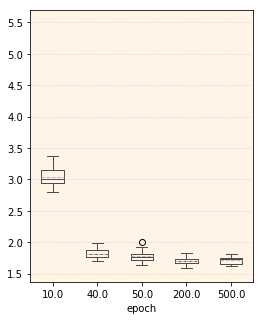

In [23]:
ax = plotBox(df_loss_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Loss")
ax.set_xlabel("epoch")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
#ax.set_xticklabels(df.C)
ax.set_facecolor("#FFAC3620")

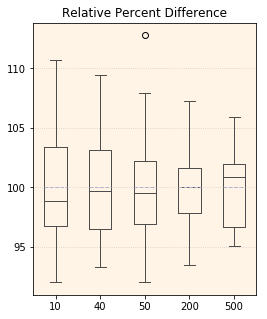

In [25]:
ax = plotBox(df_loss_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
ax.set_facecolor("#FFAC3620")

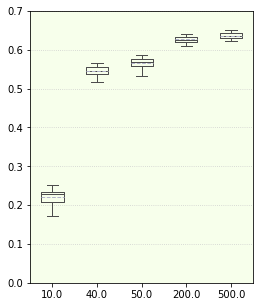

In [26]:
ax = plotBox(df_acc_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Accuracy")
#ax.set_xlabel("epoch")
ax.set_ylim(0,0.7)
ax.set_facecolor("#CBFF7725")

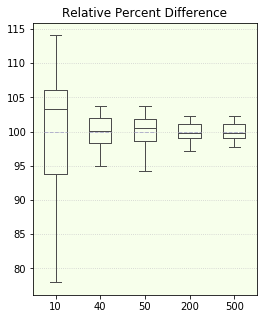

In [27]:
ax = plotBox(df_acc_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
#ax.set_xlabel("epoch")
ax.set_facecolor("#CBFF7725")